# Computational Neuroscience

## Exercise 1 


This exercise investigates __static action choice__, in which rewards immediately follow actions taken and the actor must develop a policy which maximises the immediate reward returned. 

Here we simulate the action of a bee who must choose between two flowers, blue and yellow, which yield reward in terms of a quantity of nectar. 

The choice of visiting the blue flower is denoted $[c = 1]$ and yields reward $r_1$. Conversely, the choice of visiting the yellow flower is denoted $[c = 2]$, and yields reward $r_2$. 

The bee's internal estimates of the rewards, known as __action values__, are $m_1$ and $m_2$ respectively. 

We model the bee as implementing a stochastic policy, choosing blue and yellow flowers with probabilities $P[c = 1]$ and $P[c = 2]$ according to a __softmax policy__ based on his internal reward estimates:

\begin{equation*}
P[c = 1] = \frac{e^{\beta m_1}}{e^{\beta m_1} + e^{\beta m_2}}
\end{equation*}

\begin{equation*}
P[c = 2] = \frac{e^{\beta m_2}}{e^{\beta m_1} + e^{\beta m_2}}
\end{equation*}

__a__     &emsp;  _Show that $ \sum_{c=1}^{2} p(c) = 1$._


\begin{equation*}
\begin{split}
\sum_{c=1}^{2} p(c) ={}& p \; (c = 1) +  p \; (c = 2) \\ 
={}&  \frac{e^{\beta m_1}}{e^{\beta m_1} + e^{\beta m_2}} + \frac{e^{\beta m_2}}{e^{\beta m_1} + e^{\beta m_2}} \\ \\
={}& \frac{e^{\beta m_1} + e^{\beta m_2}}{e^{\beta m_1} + e^{\beta m_2}} \\ \\
={}& 1
\end{split}
\end{equation*}

__b__     &emsp;  _Show that you can rewrite $p \; (c=1)$ as:_ 
\begin{equation*}
p \; (c=1) = \frac{1}{1 + e^{\beta(m_2 - m_2)}}
\end{equation*}

<br>

\begin{equation*}
\begin{split}
p \; (c = 1) ={}& \frac{e^{\beta m_1}}{e^{\beta m_1} + e^{\beta m_2}} \\ \\
={}&  \frac{\frac{1}{e^{\beta m_1}}e^{\beta m_1}}{\frac{1}{e^{\beta m_1}} (e^{\beta m_1} + e^{\beta m_2})} \\ \\
={}&  \frac{1}{1 + ( \frac{1}{e^{\beta m_1}} e^{\beta m_2})} \\ \\
={}&  \frac{1}{1 + e^{-\beta m_1} e^{\beta m_2}} \\ \\
={}&  \frac{1}{1 + e^{\beta(m_2 - m_1)}}
\end{split}
\end{equation*}


This allows us to express $p(c=1)$ in the format $\sigma(x)$, with $x = \beta(m_2 - m_1)$, where $\sigma(x)$ is the standard sigmoidal function: 

\begin{equation*}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation*}

This function grows monotonically from 0 to 1 as $x$ - here the difference in estimated reward - varies from $-\infty$ to $\infty$. We will see this clearly in the figures below. 

__c__     &emsp;  _Plot the formula in (b) as a function of the reward difference_

Let us set $\beta = 1$ and plot the softmax function over a range of reward differences from __-50 to 50__.

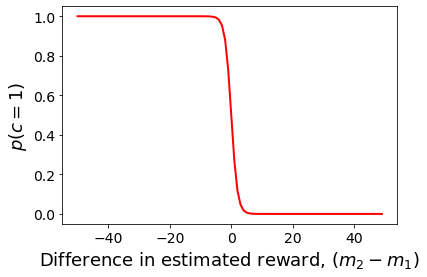

In [82]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['axes.prop_cycle'] = mpl.cycler(color=["r"]) 
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

def difference_plot(beta):
    
    d = np.zeros(100)
    for i in range(len(d)):
        d[i] = i-50 

    p = 1 / (1 + np.exp(beta*d))

    plt.plot(d, p)
    plt.xlabel(r'Difference in estimated reward, $(m_2 - m_1)$')
    plt.ylabel(r'$p(c=1)$')
    
difference_plot(1)

We see a sharp sigmoidal curve reflecting consistent decisions when the reward estimates are highly divergent, and a smooth transition between choices as the estimated reward difference switches from positive to negative. As the difference between $m_2$ and $m_1$ gets large, this means that $m_2 >> m_1$ - in other words, that the bee's internal estimate is that the reward from $c=2$ is much greater than from $c=1$. This means he chooses the yellow flower with probability 1, and the blue flower with probability zero. Conversely, as the difference between $m_2$ and $m_1$ gets very small, the bee estimates the reward from the blue flower to be much higher than that of yellow, and so chooses the blue flower consistently.

__d__     &emsp;  _Investigate the meaning of the parameter $\beta$._


Let us see what happens as we increase $\beta$ to __10__: 


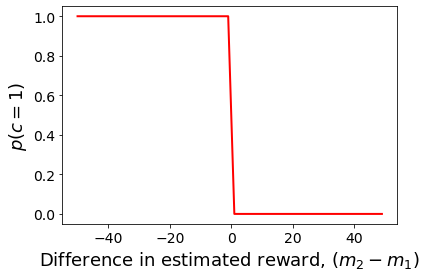

In [5]:
difference_plot(10)

We see that increasing $\beta$ has the effect of increasing the sharpness of the sigmoidal curve. The probably of choosing one flower over another increases or falls rapidly as the difference between action values increases or decreases. In behavioural terms, we may describe this as the bee's certainty or 'doggedness' in choosing one policy over another. 

Let us now decrease $\beta$ to __0.1__:

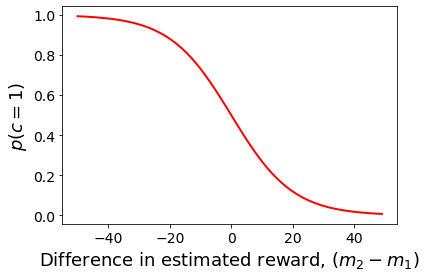

In [6]:
difference_plot(0.1)

Decreasing $\beta$ has the effect of making the bee's actions less 'certain' and more variable; the softmax probability approaches its extremes more slowly. The bee continues to choose the other flower from time to time only until his reward estimates are extremely divergent.

Out of interest, let's set $\beta$ equal __0__. We observe that he now has no preference for one flower over another, even if his estimates are extremely certain. He chooses with 50/50 chance the entire time:

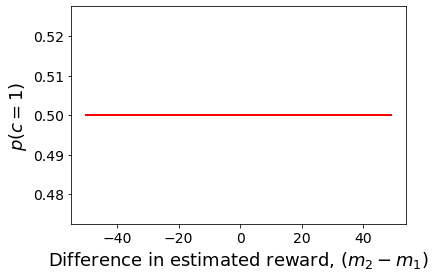

In [7]:
difference_plot(0)

Finally, let us experiment with letting $\beta$ become negative. If we choose $\beta = -1$, we see that the bee's actions are reversed contrary to his estimates - if he has a high internal estimate for the yellow flower, he will consistently choose the blue flower, and vice versa. We see that this is not such a good decision strategy for the bee. 

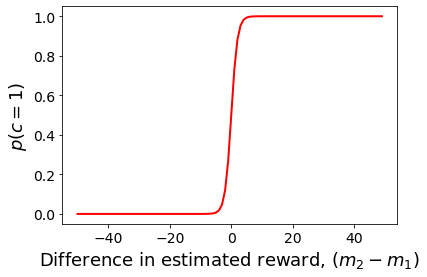

In [8]:
difference_plot(-1)

In conclusion, it seems that $\beta$ is controlling the exploration-exploitation tradeoff of the bee; how much time he will spend consistently 'exploiting' his high reward estimates versus exploring alternative options. Setting $\beta$ to high values favours exploitation over exploration, whereas setting $\beta$ to low values favours exploration.

__e__     &emsp;  _Imagine that there are N flowers instead of just two. How can you extend the above action choice strategy?_

If there are $N$ flowers, the bee therefore has $N$ possible actions ranging from $1, 2, ..., N$. We therefore have a vector of action values, $\vec{m} = [m_1, m_2, ... m_N]$, and the probability $P[c = n]$ of choosing action $n$ is given by the same softmax policy as before:

\begin{equation*}
P[c = n] = \frac{e^{\beta m_n}}{\sum_{i = 1}^{N} e^{\beta m_i}}
\end{equation*}


Let's visualise how each probability of taking action $n$ looks for a range of action values $m_n$ ranging from __0 to 10__.. We'll set $\beta$ equal to 1 at first:

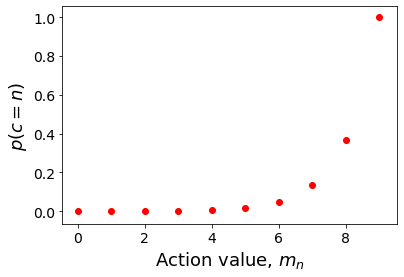

In [83]:
action_values = np.arange(10)
prob = np.zeros(10)

def multiple_options(beta):
    for i in action_values:
        total = 0
        total += np.exp(beta * action_values[i])

    for i in action_values:
        prob[i] = np.exp(beta * action_values[i]) / total

    for i in range(len(prob)):
        plt.scatter(action_values[i], prob[i])
        plt.xlabel(r'Action value, $m_n$')
        plt.ylabel(r'$p(c = n)$')
        
multiple_options(1)

It can be seen that the probability of taking the action increases exponentially as the fracion of that action value out of the total sum of all action values increases. This gives actions corresponding to the highest internal reward estimates the highest chance of being selected. 

Let's visualise the effect of changing $\beta$ here. If we decrease $\beta$ to __0.1__, we see a shallower exponential, with more exploration in choice strategy:

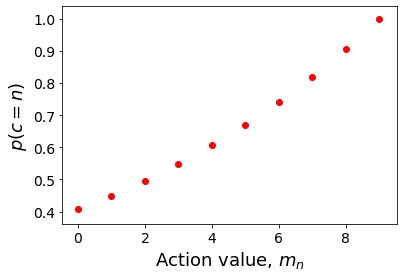

In [80]:
multiple_options(0.1)

Conversely, if we increase $\beta$ to __2__, we see a steeper exponential with more exploitation: 

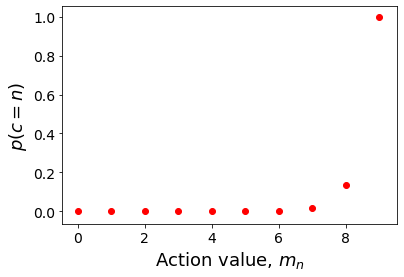

In [81]:
multiple_options(2)

__f__     &emsp;  _Imagine that there are N flowers, yet the rewards on these flowers, $r_i(t)$, change as a function of time. How should the bee adapt its internal estimates $m_i(t)$?_

If the rewards change as a function of time, the bee could implement an __indirect actor__ policy and learn to estimate the "average" or expected reward for each flower:


\begin{equation*}
m_i = \langle r_i \rangle
\end{equation*}

In which case he should update the action values according to:

\begin{equation*}
m_i \rightarrow m_i + \epsilon \; (r_{i, t} - m_i)
\end{equation*}

Where $r_{i, t}$ is the reward gained on the last visit to the flower in question.

If the learning rate $\epsilon$ is fast enough relative to the changing probability densities of the reward, each $m_i$ should track its respective $\langle r_i \rangle$. 


__g__     &emsp;  _Given the learning rules, what will happen to the bee's internal estimates $m_i(t)$ if the rewards stay constant? How does that depend on $\beta$? What is the characteristic time constant for the learning rules?_

If the reward stays constant, the bee's internal estimates $m_i(t)$ will update to this value immediately in the case of the indirect actor policy. 

In the case of __online update__, the bee's internal estimates $m_i(t)$ will converge to the constant reward value with a time constant dependent on $\beta$. If $\beta$ is large - i.e. the bee is exploiting - they will converge more quickly towards this value. If $\beta$ is small - i.e. the bee is exploring - they will converge more slowly. 

To calculate the time constant, let us denote $T_i$ as the time elapsed from the last time visiting the flower to the current time $t$. For simplicity, we'll assume it is constant. The update rule for $m_i(t)$ is:

\begin{equation*}
m_i(t) = (1 - \epsilon) m_i (t - T_i) + \epsilon r_i
\end{equation*}

If the current time $t$ is some multiple of the time that elapsed, $nT_i$, we have:

\begin{equation*}
\begin{split}
m_i(t) ={}& (1 - \epsilon)^n (m_i(0) - r_n) \\ \\
={}& (1 - \epsilon)^{\frac{t}{T_i}} (m_i(0) - r_i)
\end{split}
\end{equation*}

When $t = \tau$, the time constant, we have:

\begin{equation*}
\frac{1}{e}(m_i(0) - r_i) = m_i(\tau) =  (1 - \epsilon)^{\frac{\tau}{T_i}} (m_i(0) - r_i)
\end{equation*}

And since:

\begin{equation*}
(1 - \epsilon)^{\frac{t}{T_i}} = \frac{1}{e}
\end{equation*}

We can therefore conclude that:

\begin{equation*}
\tau = - \frac{T_i}{ln(1 - \epsilon)}
\end{equation*}
